## Mini Projeto - Data Science Academy

#### André Campos da Silva
#### 05 de Janeiro, 2021




### Projeto  -  Prevendo nivel de satisfação do cliente Santander 

Construir um modelo que permita fazer previsões se um cliente ira ou não cancelar os serviços com o banco, baseados em dados históricos.

Dataset: Santander Customer Satisfaction https://www.kaggle.com/c/santander-customer-satisfaction

Descrição dos dados:

Conjunto de dados anônimo contendo um grande número de variáveis numéricas. A coluna "TARGET" é a variável a ser prevista. É igual a 1 para clientes insatisfeitos e 0 para clientes satisfeitos.

A tarefa é prever a probabilidade de cada cliente no conjunto de testes ser um cliente insatisfeito.

## Carregando pacotes 

In [1]:
# Pacotes usados no projeto
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2,RFE,mutual_info_classif,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.neural_network import MLPClassifier


## Carregando os Dados 

In [2]:
# Carrego os dados de treino e teste. 
df_train = pd.read_csv('Dados/train.csv')
df_test = pd.read_csv('Dados/test.csv')

In [3]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


## Análise Exploratória de Dados

In [5]:
# Tipo dos dados das variáveis
df_train.dtypes.value_counts()

int64      260
float64    111
dtype: int64

In [7]:
# Sumário estatístico das variáveis
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
# Visualizando as dimensões
df_train.shape

(76020, 371)

In [9]:
# Distribuição da variável TARGET
df_train.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

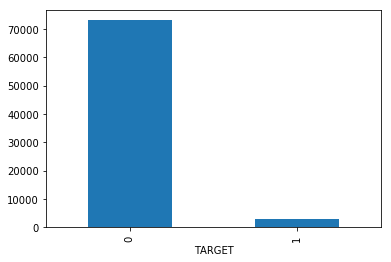

In [10]:
df_train.groupby('TARGET').size().plot(kind='bar')


In [11]:
# Verificar se existe valores nulos nos dados de treino e teste.
print(f' Dados treino: {df_train.isnull().values.any()} \n Dados test: {df_test.isnull().values.any()} ')

df_train.isnull().values.any()

 Dados treino: False 
 Dados test: False 


False

In [3]:
# Removo a variável ID  do df_treino e ID do df_teste.
df_train=df_train.drop(['ID'], axis=1)
df_test=df_test.drop(['ID'], axis=1)


In [13]:
df_train.head(3)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [14]:
df_test.head(3)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


In [4]:
# Realizando uma analise, verificamos que algumas variáveis são constantes ou seja, apresentam sempre  mesmo valor,
# Vamos extrair elas do data set pois para um algoritmo essas variáveis podem ser consideradas sem grande valor. 
uniquevalues = df_train.nunique()
uniquevalues = uniquevalues[uniquevalues==1]
uniquevalues.count()

34

In [5]:
# Retiro essas variáveis tanto do meu data set de treino quanto do de teste, como o algoritmo não vai conhecer essas variáveis, as retiro do teste.  
df_train = df_train.drop(uniquevalues.index, axis=1)
df_test = df_test.drop(uniquevalues.index, axis=1)

In [9]:
# Verifico o shape apos a exclusão dessas variáveis 
print (f' Dados treino:{df_train.shape} \n Dados Teste: {df_test.shape}')


 Dados treino:(76020, 336) 
 Dados Teste: (75818, 335)


## Balanceamento dos dados com o SMOTE

In [6]:
# Como ja vimos anteriormente  e agora novamente temos muitos mais casos de clientes satisfeito do que insatisfeitos 
# Temos que balancear para não deixar o algoritmo tendencioso. 

df_train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [7]:
# Extrario as variaveis preditoras e target para treinar como SMOTE
X_df_train_Smote = df_train.iloc[:,0:335]
Y_df_train_Smote = df_train['TARGET']

In [8]:
X_df_train_Smote.shape

(76020, 335)

In [9]:
# Faço o balanceamento das variavel target 
smt = SMOTE()
X_df_train_Smote,Y_df_train_Smote = smt.fit_sample(X_df_train_Smote,Y_df_train_Smote)

In [10]:
X_df_train_Smote.shape

(146024, 335)

In [11]:
Y_df_train_Smote.value_counts()

1    73012
0    73012
Name: TARGET, dtype: int64

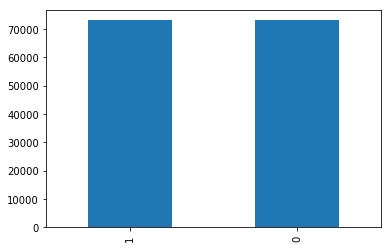

In [45]:
Y_df_train_Smote.value_counts().plot(kind='bar')


## Feature Selection

### Funções auxiliares 

Criarei algumas funções auxiliares que nos ajudarão a normalizar os dados, selecionar as melhores variáveis e tecnica PCA

In [19]:
# Função para normalização e padronização de dados 

def dataNormalization(features, transform = None):
    
    if transform == 'MM':
        scaler = MinMaxScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features)
        
    elif transform == 'N':
        scaler = Normalizer()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        
    elif transform == 'SS':
        scaler = StandardScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features, copy=None)
        
    return rescaled_featuresDF

In [20]:
# Função para aplicar técnica  PCA

def pcaFeatures( features, n_components = None ):
    # Normalizando os dados
    scaler = MinMaxScaler(feature_range = (0, 1))
    FeatureMM = scaler.fit_transform(features)
    
    # Seleção de atributos
    pca = PCA(n_components)
    Feature_PCA = pca.fit_transform(FeatureMM)
    
    return Feature_PCA 


In [21]:
# Função para seleção das melhores variáveis 

# KindSelection = None -> padrão para todos, função que determina qual sera o algortmo de seleção
# feature_number = None -> quantidade de variáveis com mais importancia. 
# columns = None -> Padrão para todos, deve criar uma variavel columns contendo os nomes das variaveis.
# score_func = None -> usado no Selectbest, como por exemplo chi2 
# n_estimators = None -> usado no RandomForestClassifier, por exemplo 200.
# random_state = usado no RandomForestClassifier.
# discrete_features = None -> usado no mutual_info_classif, exemplo 'auto'

def FeatureSelection (features, target,columns = None, KindSelection = None, score_func = None, feature_number = None, n_estimators = None,
                      random_state = None, discrete_features = None):
    
    # Usando o SelectKBest para seleção das variáveis 
    if KindSelection == 'SKB':
        best_var = SelectKBest(score_func, k = feature_number)
        features_SKB = best_var.fit_transform(features, target)
        Best_features = columns[best_var.get_support()]
    
    # Usando o ExtraTreesClassifier para seleção das variáveis
    elif KindSelection == 'ETC':
        best_var = ExtraTreesClassifier()
        features_ETC = best_var.fit(features, target)
        features_importance = pd.DataFrame(data = features_ETC.feature_importances_, index = columns, columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by = 'Importance_Score', ascending = False).head(feature_number)
     
    # Usando o RFE para seleção das variáveis
    elif KindSelection == 'RFE':
        modelo = LogisticRegression()
        best_var = RFE(modelo, feature_number)
        features_RFE = best_var.fit(features, target)
        Best_features=columns[[i for i in columns if i in features_RFE.support_]]
    
    # Usando o RandomForestClassifier para seleção das variáveis
    elif KindSelection == 'RFC':
        best_var = RandomForestClassifier(n_estimators = n_estimators,random_state = random_state)
        features_RFC = best_var.fit(features, target)
        predictF = features_RFC.predict(features)
        features_importance = pd.Series(data = features_RFC.feature_importances_, index = columns)
        Best_features_RFC = features_importance.nlargest(feature_number)
        Best_features = Best_features_RFC.index

    # Usando o mutual_info_classif para seleção das variáveis
    elif KindSelection == 'MIC':
        best_var = mutual_info_classif(features, target, discrete_features , n_neighbors = 3 )
        features_importance = pd.DataFrame(best_var, index = columns,  columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by='Importance_Score', ascending=False).head(feature_number)
        
    return Best_features

### Selecionando variáveis mais importantes em cada algortimo
 

#### Min Max Scaler

In [60]:
# Pego os nomes das colunas 
columns = X_df_train_Smote.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainMM = dataNormalization(features = X_df_train_Smote , transform = 'MM')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainMM, target=Y_df_train_Smote, KindSelection ='SKB' , columns = columns, score_func = chi2, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainMM, target=Y_df_train_Smote, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainMM, target=Y_df_train_Smote, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
X_featureMM = X_trainMM[[i for i in X_trainMM if i in feature.values]]

# Retiro possiveis colunas duplicadas
X_featureMM = X_featureMM.T.drop_duplicates().T

X_featureMM.columns

Index(['var15', 'ind_var5', 'ind_var12_0', 'ind_var30', 'saldo_var5',
       'saldo_var30', 'saldo_var42', 'var36', 'ind_var43_recib_ult1',
       'num_meses_var5_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

#### Normalizer

In [70]:
# Pego os nomes das colunas 
columns = X_df_train_Smote.columns

# Usando a função de normalização convertos os dados para a escala Normalizer
X_trainN = dataNormalization(features = X_df_train_Smote , transform = 'N')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainN, target=Y_df_train_Smote, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 10, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainN, target=Y_df_train_Smote, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 10, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainN, target=Y_df_train_Smote, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 10, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
X_featureN = X_trainN[[i for i in X_trainN if i in feature.values]]

# Retiro possiveis colunas duplicadas
X_featureN = X_featureN.T.drop_duplicates().T

X_featureN.columns

Index(['var15', 'ind_var5', 'ind_var30_0', 'ind_var30', 'ind_var39_0',
       'num_var4', 'num_var5_0', 'num_var5', 'num_var30_0', 'num_var30',
       'num_var35', 'num_var42', 'saldo_var30', 'var36',
       'num_meses_var5_ult3'],
      dtype='object')

#### StandardScaler

In [69]:
# Pego os nomes das colunas 
columns = X_df_train_Smote.columns

# Usando a função de normalização convertos os dados para a escala StandardScaler
X_trainSS = dataNormalization(features = X_df_train_Smote , transform = 'SS')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainSS, target=Y_df_train_Smote, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainSS, target=Y_df_train_Smote, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainSS, target=Y_df_train_Smote, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 6, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
X_featureSS = X_trainSS[[i for i in X_trainSS if i in feature.values]]

# Retiro possiveis colunas duplicadas
X_featureSS = X_featureSS.T.drop_duplicates().T

X_featureSS.columns

Index(['var15', 'ind_var5', 'ind_var30', 'num_var5', 'num_var30', 'num_var35',
       'num_var42', 'saldo_var30', 'saldo_var42', 'var36',
       'num_meses_var5_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

#### PCA

In [22]:
# Faço um filtro com a seleção de variáveis com o mim max scaler para pegar 120  variáveis mais importantes com o RandomForestClassifier

# Pego os nomes das colunas 
columns = X_df_train_Smote.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainPCA = dataNormalization(features = X_df_train_Smote , transform = 'MM')

# Seleção de variável com o RandomForestClassifier
variaveis_RFC= FeatureSelection(features=X_trainPCA, target=Y_df_train_Smote, KindSelection ='RFC' , columns = columns, score_func = None, feature_number = 120, n_estimators = 200,
                      random_state = 0, discrete_features = None)
variaveis_RFC

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.Series(variaveis_RFC)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
X_featurePCA = X_trainPCA[[i for i in X_trainPCA if i in feature.values]]


In [25]:
# Faço uma copia dos nomes das variáveis selecionadas para usar no dataset de test antes de aplicar o PCA
X_featurePCA_columns = X_featurePCA.columns

# Crio um data set com os valores padrões mas com apenas as variaveis selecionadas acima.
X_trainPCA = X_df_train_Smote[[i for i in X_df_train_Smote if i in X_featurePCA]]

# Passo esses dados para a função do PCA criando 4 componentes
X_featurePCA_2 = pcaFeatures(features=X_trainPCA, n_components=4)
X_featurePCA_2

array([[-0.80903157,  0.19404366, -0.58961449, -0.13620562],
       [ 0.32635955,  0.0187023 , -0.31534237,  0.86948858],
       [ 0.59372718, -0.45984581, -0.15042893, -0.40213889],
       ...,
       [-0.21907376,  0.04033232, -0.43031104,  0.09887826],
       [-0.95577078, -0.26901091,  0.93613917,  0.12303758],
       [-1.30089839, -0.19228147,  0.84293463, -0.04275389]])

In [27]:
# Salvo o data frame ja tratado e com as variáveis selecionadas em cada etapa.

X_featureMM.to_csv('Dados/X_featureMM.csv',encoding='utf-8', index=None)
X_featureN.to_csv('Dados/X_featureN.csv',encoding='utf-8', index=None)
X_featureSS.to_csv('Dados/X_featureSS.csv',encoding='utf-8', index=None)
pd.DataFrame(X_featurePCA_2).to_csv('Dados/X_featurePCA.csv',encoding='utf-8', index=None)

In [12]:
# Carregando as os data frame salvo anteriomente 
X_featureMM = pd.read_csv('Dados/X_featureMM.csv')
X_featureN = pd.read_csv('Dados/X_featureN.csv')
X_featureSS = pd.read_csv('Dados/X_featureSS.csv')
X_featurePCA = pd.read_csv('Dados/X_featurePCA.csv')

## Análise preditiva dados treino

### Funções auxiliares 

In [13]:
def classifiersAlgorithmsTTS(X_train, Y_train, X_test, Y_test):
    
    # Preparando a lista de modelos
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('NB', GaussianNB()))
    modelos.append(('KNN', KNeighborsClassifier()))
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('RF', RandomForestClassifier()))
  
    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        # Treino o modelo
        modelo.fit(X_train, Y_train)
        # Faço as Previsões de teste 
        previsao = modelo.predict(X_test)
        # Accuracy do modelo 
        results = accuracy_score(Y_test, previsao)
        resultados.append(results)
        nomes.append(nome)
        print(f'{nome}:{results:.2f}% - Accuracy \n')
        
        # Avaliando Recall com o classification Report 
        print( classification_report(Y_test, previsao))
        
        # Matriz de confusão do modelo 
        print(pd.crosstab(Y_test, previsao, rownames=['Real'], colnames=['Previsto'], margins=True))
        print('\n')
  

In [14]:
def classifiersAlgorithmsEnsembleTTS(X_train, Y_train, X_test, Y_test):

    # Preparando a lista de modelos
    modelos = []
    # Modelo BaggingClassifier
    modelos.append(('BC', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)))
    
    # Modelo Voting Classifier
    # coloco todos os modelos criados em uma lista para usar no algoritmo VotingClassifier
    estimators = []
    estimators.append(('KNN', KNeighborsClassifier()))
    estimators.append(('DTC', GaussianNB()))
    estimators.append(('RF', RandomForestClassifier(n_estimators = 100, max_features = 3)))
    estimators.append(('gboost',GradientBoostingClassifier()))
    estimators.append(('nn', MLPClassifier()))
    estimators.append(('NB', GaussianNB()))
    estimators.append(('LR', LogisticRegression()))

    # Crio o modelo
    modelos.append(('VC', VotingClassifier(estimators=estimators)))
    
    # Modelo com o StackingClassifier
    modelos.append(('SC',StackingClassifier(estimators=estimators)))

  
    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        # Treino o modelo
        modelo.fit(X_train, Y_train)
        # Faço as Previsões de teste 
        previsao = modelo.predict(X_test)
        # Accuracy do modelo 
        results = accuracy_score(Y_test, previsao)
        resultados.append(results)
        nomes.append(nome)
        print(f'{nome}:{results:.2f}% - Accuracy \n')
        
        # Avaliando Recall com o classification Report 
        print( classification_report(Y_test, previsao))
        
        # Matriz de confusão do modelo 
        print(pd.crosstab(Y_test, previsao, rownames=['Real'], colnames=['Previsto'], margins=True))
        print('\n')

### Variáveis selecionadas com o Min Max Scaler

#### Algotitmos Individuais 

In [20]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureMM, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsTTS(X_train, Y_train, X_test, Y_test)

LR:0.76% - Accuracy 

              precision    recall  f1-score   support

           0       0.79      0.69      0.74     24012
           1       0.73      0.82      0.77     24176

    accuracy                           0.76     48188
   macro avg       0.76      0.76      0.75     48188
weighted avg       0.76      0.76      0.75     48188

Previsto      0      1    All
Real                         
0         16672   7340  24012
1          4421  19755  24176
All       21093  27095  48188


NB:0.58% - Accuracy 

              precision    recall  f1-score   support

           0       0.82      0.20      0.33     24012
           1       0.55      0.96      0.70     24176

    accuracy                           0.58     48188
   macro avg       0.68      0.58      0.51     48188
weighted avg       0.68      0.58      0.51     48188

Previsto     0      1    All
Real                        
0         4915  19097  24012
1         1063  23113  24176
All       5978  42210  48188


KNN

O RandomForestClassifier teve um melhor desempenho com 91% de acuracia 

#### Algotitmos Ensemble 

In [21]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureMM, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsEnsembleTTS(X_train, Y_train, X_test, Y_test)

BC:0.92% - Accuracy 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     24006
           1       0.91      0.94      0.92     24182

    accuracy                           0.92     48188
   macro avg       0.92      0.92      0.92     48188
weighted avg       0.92      0.92      0.92     48188

Previsto      0      1    All
Real                         
0         21843   2163  24006
1          1563  22619  24182
All       23406  24782  48188


VC:0.91% - Accuracy 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     24006
           1       0.90      0.93      0.92     24182

    accuracy                           0.91     48188
   macro avg       0.91      0.91      0.91     48188
weighted avg       0.91      0.91      0.91     48188

Previsto      0      1    All
Real                         
0         21509   2497  24006
1          1646  22536  24182
All       23155  25033  48188


O BaggingClassifier teve um melhor desempenho com 92% de acuracia 

### Variáveis selecionadas com o Normalizer

#### Algotitmos Individuais 

In [22]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureN, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsTTS(X_train, Y_train, X_test, Y_test)

LR:0.56% - Accuracy 

              precision    recall  f1-score   support

           0       0.79      0.17      0.28     24127
           1       0.53      0.95      0.68     24061

    accuracy                           0.56     48188
   macro avg       0.66      0.56      0.48     48188
weighted avg       0.66      0.56      0.48     48188

Previsto     0      1    All
Real                        
0         4020  20107  24127
1         1089  22972  24061
All       5109  43079  48188


NB:0.71% - Accuracy 

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     24127
           1       0.68      0.77      0.72     24061

    accuracy                           0.71     48188
   macro avg       0.71      0.71      0.70     48188
weighted avg       0.71      0.71      0.70     48188

Previsto      0      1    All
Real                         
0         15496   8631  24127
1          5550  18511  24061
All       21046  27142  48188


KNN

O RandomForestClassifier teve um melhor desempenho com 91% de acuracia 

#### Algotitmos Ensemble 

In [15]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureN, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsEnsembleTTS(X_train, Y_train, X_test, Y_test)

BC:0.92% - Accuracy 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     24183
           1       0.90      0.93      0.92     24005

    accuracy                           0.92     48188
   macro avg       0.92      0.92      0.92     48188
weighted avg       0.92      0.92      0.92     48188

Previsto      0      1    All
Real                         
0         21811   2372  24183
1          1709  22296  24005
All       23520  24668  48188


VC:0.92% - Accuracy 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     24183
           1       0.91      0.93      0.92     24005

    accuracy                           0.92     48188
   macro avg       0.92      0.92      0.92     48188
weighted avg       0.92      0.92      0.92     48188

Previsto      0      1    All
Real                         
0         21964   2219  24183
1          1682  22323  24005
All       23646  24542  48188


Todos os 3 tiveram uma acuracia de 92%. 

### Variáveis selecionadas com o StandardScaler


#### Algotitmos Individuais 

In [16]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureSS, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsTTS(X_train, Y_train, X_test, Y_test)

LR:0.77% - Accuracy 

              precision    recall  f1-score   support

           0       0.80      0.73      0.76     24138
           1       0.75      0.81      0.78     24050

    accuracy                           0.77     48188
   macro avg       0.78      0.77      0.77     48188
weighted avg       0.78      0.77      0.77     48188

Previsto      0      1    All
Real                         
0         17674   6464  24138
1          4462  19588  24050
All       22136  26052  48188


NB:0.75% - Accuracy 

              precision    recall  f1-score   support

           0       0.81      0.67      0.73     24138
           1       0.72      0.84      0.77     24050

    accuracy                           0.75     48188
   macro avg       0.76      0.75      0.75     48188
weighted avg       0.76      0.75      0.75     48188

Previsto      0      1    All
Real                         
0         16081   8057  24138
1          3758  20292  24050
All       19839  28349  48188


O RandomForestClassifier teve um melhor desempenho com 92% de acuracia 

#### Algotitmos Ensemble 

In [17]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featureSS, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsEnsembleTTS(X_train, Y_train, X_test, Y_test)

BC:0.93% - Accuracy 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     24071
           1       0.92      0.94      0.93     24117

    accuracy                           0.93     48188
   macro avg       0.93      0.93      0.93     48188
weighted avg       0.93      0.93      0.93     48188

Previsto      0      1    All
Real                         
0         21986   2085  24071
1          1482  22635  24117
All       23468  24720  48188


VC:0.92% - Accuracy 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     24071
           1       0.91      0.92      0.92     24117

    accuracy                           0.92     48188
   macro avg       0.92      0.92      0.92     48188
weighted avg       0.92      0.92      0.92     48188

Previsto      0      1    All
Real                         
0         21991   2080  24071
1          1817  22300  24117
All       23808  24380  48188


O BaggingClassifier teve um melhor desempenho com 93% de acuracia 

### Variáveis selecionadas com o PCA

#### Algotitmos Individuais 

In [29]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featurePCA, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsTTS(X_train, Y_train, X_test, Y_test)

LR:0.74% - Accuracy 

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     24101
           1       0.73      0.79      0.76     24087

    accuracy                           0.74     48188
   macro avg       0.75      0.74      0.74     48188
weighted avg       0.75      0.74      0.74     48188

Previsto      0      1    All
Real                         
0         16910   7191  24101
1          5102  18985  24087
All       22012  26176  48188


NB:0.75% - Accuracy 

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     24101
           1       0.74      0.75      0.75     24087

    accuracy                           0.75     48188
   macro avg       0.75      0.75      0.75     48188
weighted avg       0.75      0.75      0.75     48188

Previsto      0      1    All
Real                         
0         17803   6298  24101
1          5944  18143  24087
All       23747  24441  48188


O RandomForestClassifier teve um melhor desempenho com 89% de acuracia 

#### Algotitmos Ensemble 

In [30]:
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_train, X_test, Y_train, Y_test = train_test_split(X_featurePCA, Y_df_train_Smote, test_size = teste_size)

# Passo os dados para a função de predição 
classifiersAlgorithmsEnsembleTTS(X_train, Y_train, X_test, Y_test)

BC:0.88% - Accuracy 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     24006
           1       0.88      0.89      0.88     24182

    accuracy                           0.88     48188
   macro avg       0.88      0.88      0.88     48188
weighted avg       0.88      0.88      0.88     48188

Previsto      0      1    All
Real                         
0         21108   2898  24006
1          2733  21449  24182
All       23841  24347  48188


VC:0.89% - Accuracy 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     24006
           1       0.88      0.89      0.89     24182

    accuracy                           0.89     48188
   macro avg       0.89      0.89      0.89     48188
weighted avg       0.89      0.89      0.89     48188

Previsto      0      1    All
Real                         
0         21166   2840  24006
1          2689  21493  24182
All       23855  24333  48188


Voting Classifier teve um nelhor desempenho com 89% de acuracia

## Analise preditiva dados teste

Utilizarei o melhor algortimo em cada escala para a analise preditiva nos dados de teste. 



### Preparação dos dados de teste para receber o algortimo


In [52]:
# Primeiro faço um filtro criando um data set novo com apenas as variáveis selecionadas para cada scala.
df_testSS = df_test[[i for i in df_test if i in X_featureSS.columns]]
df_testMM = df_test[[i for i in df_test if i in X_featureMM.columns]]
df_testPCA = df_test[[i for i in df_test if i in X_featurePCA_columns]]

# Aplico a escala correta para cada um.
df_testSS =dataNormalization(features = df_testSS , transform = 'SS')
df_testMM =dataNormalization(features = df_testMM , transform = 'MM')

# Faço agora a do PCA
# Passo esses dados para a função do PCA criando 4 componentes
df_testPCA = pcaFeatures(features=df_testPCA, n_components=4)



### Aplico o algoritmo selecionado para cada dataset.

#### BaggingClassifier com o Standard Scaler

In [69]:
# Cração do modelo 
modelo = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

# Treinamento do modelo com os dados treino.
modelo.fit(X_featureSS, Y_df_train_Smote)

# Previsões nos dados teste
previsao = modelo.predict(df_testSS)

# Coloco as previsões junto com o dataframe teste.
df_test['TARGET_BC'] = previsao

# Imprimo a quantidade para cada previsão.
df_test.groupby('TARGET_BC').size()


TARGET_BC
0    53038
1    22780
dtype: int64

De 75.818 resultados, o modelo com o BaggingClassifier previu que 53038 clientes estão satisfeito e possivelmente continuarão com o serviço e 22780 estariam insatisfeitos e possivelmente podem cancelar o serviço.

#### StackingClassifier com o Min Max Scaler


In [71]:
# Coloco todos os modelos criados em uma lista para usar no algoritmo 
estimators = []
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('DTC', GaussianNB()))
estimators.append(('RF', RandomForestClassifier(n_estimators = 100, max_features = 3)))
estimators.append(('gboost',GradientBoostingClassifier()))
estimators.append(('nn', MLPClassifier()))
estimators.append(('NB', GaussianNB()))
estimators.append(('LR', LogisticRegression()))

# Cração do modelo 
modelo = StackingClassifier(estimators=estimators)

# Treinamento do modelo com os dados treino.
modelo.fit(X_featureMM, Y_df_train_Smote)

# Previsões nos dados teste
previsao = modelo.predict(df_testMM)

# Coloco as previsões junto com o dataframe teste.
df_test['TARGET_SC'] = previsao

# Imprimo a quantidade para cada previsão.
df_test.groupby('TARGET_SC').size()


TARGET_SC
0    44664
1    31154
dtype: int64

De 75.818 resultados, o modelo com o StackingClassifier previu que 44664 clientes estão satisfeito e possivelmente continuarão com o serviço e 31154 estariam insatisfeitos e possivelmente podem cancelar o serviço.

#### Voting Classifier com o PCA

In [77]:
# Modelo Voting Classifier
# Coloco todos os modelos criados em uma lista para usar no algoritmo VotingClassifier
estimators = []
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('DTC', GaussianNB()))
estimators.append(('RF', RandomForestClassifier(n_estimators = 100, max_features = 3)))
estimators.append(('gboost',GradientBoostingClassifier()))
estimators.append(('nn', MLPClassifier()))
estimators.append(('NB', GaussianNB()))
estimators.append(('LR', LogisticRegression()))
    
# Cração do modelo 
modelo = VotingClassifier(estimators=estimators)

# Treinamento do modelo com os dados treino.
modelo.fit(X_featurePCA, Y_df_train_Smote)

# Previsões nos dados teste
previsao = modelo.predict(df_testPCA)

# Coloco as previsões junto com o dataframe teste.
df_test['TARGET_VC'] = previsao

# Imprimo a quantidade para cada previsão.
df_test.groupby('TARGET_VC').size()

TARGET_VC
0    51672
1    24146
dtype: int64

De 75.818 resultados, o modelo com o VotingClassifier previu que 51672 clientes estão satisfeito e possivelmente continuarão com o serviço e 24146 estariam insatisfeitos e possivelmente podem cancelar o serviço.